# Hacktiv8 Talent Fair Vol. 4 Challenge
# Time-Series Forecasting on Cosmetics brand 

# Introduction 

  Nama : Rizqi Golda

  Batch : FTDS-018-RMT

  Dataset : `sample_dataset_timeseries_noarea.csv`

   Dataset ini berisi informasi histori sales penjualan di setiap barang pada tiap minggu

  Objective :

          Memprediksi penjualan di satu periode setelahnya.
          Model yang dibuat mempunyai nilai akurasi yang baik.
          Dapat menjelaskan metodologi pada setiap jalan.
          Dapat membuat data chart pada model inference.





# External Link 

# Working Area 

## Install and Import Library 

disini saya menginstal `library` yang diperlukan untuk kegiatan *forecasting* data pada periode berikutnya.

In [48]:
! pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 14.2 MB/s eta 0:00:00


memasukkan semua library yang diperlukan selama proses `forecasting`

In [295]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import matplotlib.patches as mpatches

# Library Model Time Series
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.tsa.api import ExponentialSmoothing
from statsmodels.tsa.seasonal import STL
from pmdarima.arima import ADFTest, auto_arima

# Library Evaluasi
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

import warnings
warnings.filterwarnings('ignore')

## Data Loading

mengambil dataset dari *github*

In [2]:
datasheet = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/talent_fair_sample_challenge/main/datasets/sample_dataset_timeseries_noarea.csv')

melihat 5 data teratas

In [9]:
datasheet.head()

,week_number,week_start_date,week_end_date,product_item,quantity
0,2021-52,2021-12-27,2022-01-02,0073377087c7ddace313ff829cd7b0b3,41
1,2021-52,2021-12-27,2022-01-02,012d2bb142b2d5e57330acbfd8e9ac52,430
2,2021-52,2021-12-27,2022-01-02,0192926e33d1153b63511a5b83eca843,4
3,2021-52,2021-12-27,2022-01-02,019502f6d13e383caa9b9673bf1302f8,148
4,2021-52,2021-12-27,2022-01-02,01e7ca6d4e21badc1d4225b6b2c7bd9e,119


melihat 5 data terbawah

In [5]:
datasheet.tail()

,week_number,week_start_date,week_end_date,product_item,quantity
102728,2023-14,2023-04-03,2023-04-09,ff3890faa80ff425ae906e27bbc50bc6,907
102729,2023-14,2023-04-03,2023-04-09,ff4b0f3b9c78c91510a4e3920fbc5090,81
102730,2023-14,2023-04-03,2023-04-09,ff9d05a4d6f922b3ab1653f58165b8ce,16
102731,2023-14,2023-04-03,2023-04-09,ffbd6f1d884056a4f622d54ae79e5a14,42920
102732,2023-14,2023-04-03,2023-04-09,fff18f7c705e729746515e2053dee64b,53


melihat informasi sederhana pada data

In [6]:
datasheet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102733 entries, 0 to 102732
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   week_number      102733 non-null  object
 1   week_start_date  102733 non-null  object
 2   week_end_date    102733 non-null  object
 3   product_item     102731 non-null  object
 4   quantity         102733 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 3.9+ MB


dataset yang digunakan kali ini terdapat 102733 baris dengan 5 kolom.

## EDA

### EDA Preparing

In [124]:
df = datasheet.copy()

men-duplikat dataset agar tidak rusak saat pengerjaan nantinya

In [279]:
df['week_start_date'] = pd.to_datetime(df['week_start_date'])

mengubah bentuk data `week_start_date` menjadi data tanggal.

### EDA Script

In [285]:
df_1 = df.loc[:, df.columns.isin(['week_start_date', 'product_item','quantity'])]  # mengambil data week_start_date, product_item, quantity saja.
df_1_2 = df_1.loc[df_1['week_start_date'] >= '2022-01-01'] # mengambil data yang dimulai dari tahun 2022 saja
df_1_3 = df_1_2.loc[df_1_2['week_start_date'] < '2023-01-01'] # mengambil data yang diakhiri pada tahun 2022 di data sebelumnya
df_1_4 = df_1_3.groupby('product_item').sum() # grouping data berdasarkan product_item nya
df_1_5 = df_1_4.sort_values(by='quantity', ascending=False) # mengurutkan dari besar ke kecil data quality diatas
df_1_5_b = df_1_4.sort_values(by='quantity', ascending=True) # mengurutkan dari kecil ke best data quality diatas
df_1_6 = df_1_5.iloc[:10] # melihat 10 data terbesar saja
df_1_6_b = df_1_5_b.iloc[:10] # melihat 10 data terkecil saja
df_1_7 = df_1_5.iloc[10:] # melihat sisa dari 10 data terbesar
df_1_8 = df_1_7.sum() # menjumlahkan sisa 10 data terbesar
df_1_9 = pd.DataFrame(df_1_8).T
df_1_10 = df_1_6.append(df_1_9) # menggabungkan sisa data terbesar tadi di kolo 10 data terbesar
df_1_11 = df_1_4.sum() # melihat total dari keselurusan data tiap product_item di tahun 2022 saja
df_1_12 = pd.DataFrame(df_1_11).T 

In [262]:
df_2_1 = df_1.loc[df_1['week_start_date'] >= '2022-01-01'] # mengambil data yang dimulai dari tahun 2022 saja
df_2_2 = df_2_1.loc[df_2_1['week_start_date'] < '2022-04-05'] # mengambil data yang diakhiri pada tahun 2022 bulan 04 dan hari 05 di data sebelumnya
df_2_3 = df_2_2.sum() # dijumlah total penjualan berdasarkan product_item nya

df_3_1 = df_1.loc[df_1['week_start_date'] >= '2023-01-01'] # mengambil data yang dimulai dari tahun 2023 saja
df_3_2 = df_3_1.sum() # dijumlah total penjualan berdasarkan product_item nya

data = {'Tahun': ['2022', '2023'],
        'penjualan': [df_2_3['quantity'], df_3_2['quantity']]}
df_4 = pd.DataFrame(data) # mencoba membandingkan penjualan dari tahun 2022 dan 2023 sampai minggu ke 14 di keduanya.

In [273]:
df_5 = df.loc[:, df.columns.isin(['week_start_date', 'quantity'])] # mengambil data yang berisikan week_start_date dan quantity saja
df_5_2 = df_5.groupby('week_start_date').sum() # menjumlahkan quantity berdasarkan tanggal awal pencatatan
df_5_3 = df_5_2.sort_values(by='quantity', ascending= False) # sortir data diatas dari yang tertinggi sampai terendah

In [265]:
stl = STL(df_5_2['quantity'][:], period=12) # mengambil data pada tiap bulannya untuk melihat seasonal nya
res = stl.fit()

### EDA dataset

#### informasi sederhana

In [278]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102733 entries, 0 to 102732
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   week_number      102733 non-null  object        
 1   week_start_date  102733 non-null  datetime64[ns]
 2   week_end_date    102733 non-null  object        
 3   product_item     102731 non-null  object        
 4   quantity         102733 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 3.9+ MB


terlihat bahwa terdapat 2 data yang kosong pada `product_item`.

In [286]:
df.describe()

,quantity
count,102733.000000
mean,3191.562419
std,12074.631014
min,0.000000
25%,75.000000
50%,414.000000
75%,1890.000000
max,774732.000000


pada dataset yang diterima, diketahui bahwa penjualan tiap minggunya memiliki rata-rata penjualan di sekitar 3200 pcs dan memiliki nilai median diangka 414 pcs pada setiap jenis barangnya. penjualan terendah pada tiap jenis barangnya pada nilai 0 dan penjualan tertinggi di jenis barangnya berada di 774732 pcs di setiap minggunya. 

#### penjualan barang tahun 2022

##### tabel penjualan

In [271]:
print('---'*14)
print('10 barang terlaris tahun 2022')
print(df_1_6)
print('---'*14)
print('\n')
print('---'*14)
print('10 barang paling tidak laku tahun 2022')
print(df_1_6_b)
print('---'*14)
print('\n')
print('---'*14)
print('total barang yang terjual tahun 2022')
print(df_1_12)
print('---'*14)

------------------------------------------
10 barang terlaris tahun 2022
                                  quantity
product_item                              
2949ca4cfbf13969bccfbb9817f2526a  14881934
2db7ed9bd7573aec037aac59237cb3dd   7358733
160eb16a7369a645ec75caa3f14543d4   5330209
229a936943f7da9feea525f1a48d1d03   5221727
0f9d1e065ad64ecd7237084107a4bfbd   3464801
b194ef33e06abf24820fd38922554c16   2933361
6337f7f220187dcbfd7eb3baecd0e5b2   2926989
ffbd6f1d884056a4f622d54ae79e5a14   2821022
4275094eb25dd0a337a57f466008ec43   2772720
eb7924c4a3535c584b8ff04587aa5b29   2582747
------------------------------------------


------------------------------------------
10 barang paling tidak laku tahun 2022
                                  quantity
product_item                              
d79c7a64e815ebb411b976fc2444f750         2
643fd2bcc3608650ecfa16b714c7cacb         2
b3668db858f2e923f12ea3a795c6faf0         2
1c668b91d9207e5d798b5277fc6c4c16         2
8547a35c031cf6ede36db85298

dari data diatas, terlihat bahwa:
    
    Penjualan jenis barang terlaris pada tahun 2022 berjumlah 14881934 pcs, dan diikuti dengan jumlah 7358733 pcs di jenis barang kedua terlaris.
    Terdapat beberapa jenis barang yang memiliki penjualan hanya 2 pcs di tahun 2022.
    Total penjualan di semua jenis barang berjumlah 263753550 pcs.



##### piechart penjualan 10 barang terlaris

In [257]:
fig = px.pie(values=df_1_6['quantity'], names=df_1_6.index, title="10 barang terlaris tahun 2022")
fig.show()

dari piechart diatas, terlihat bahwa produk `2949ca4cfbf13969bccfbb9817f2526a` mendapatkan proporsi hampir 30% dari total 10 barang terlaris. kemudian diikuti oleh produk `2db7ed9bd7573aec037aac59237cb3dd` dengan proporsi 14,6% dan `160eb16a7369a645ec75caa3f14543d4` demham 10,6%.

#### Perbandingan penjualan tahun 2022 dan 2023

In [282]:
print(df_4)

  Tahun  penjualan
0  2022   60799917
1  2023   63996158


In [259]:
fig = px.bar(df_4, x='Tahun', y='penjualan', title='Penjualan tahun 2022 dan 2023 per 14 minggu pertama')
fig.show()

terlihat dari tabel diatas, bahwa terdapat penambahan penjualan pada 14 minggu pertama ditahun 2023 daripada penjualan di 14 minggu pertama tahun 2022. terlihat pada tabel diatas terdapat pertambahan penjualan sebanyak lebih dari 3 juta pcs dari tahun sebelumnya.

#### grafik penjualan tiap minggu

In [274]:
print(df_5_3)

                 quantity
week_start_date          
2022-05-09        7172144
2022-06-06        6260083
2022-08-08        6256332
2022-08-01        6143352
2022-08-29        6112693
...                   ...
2022-01-03        3839557
2023-02-27        3732954
2023-02-13        3731588
2022-05-02        1334134
2021-12-27         128808

[67 rows x 1 columns]


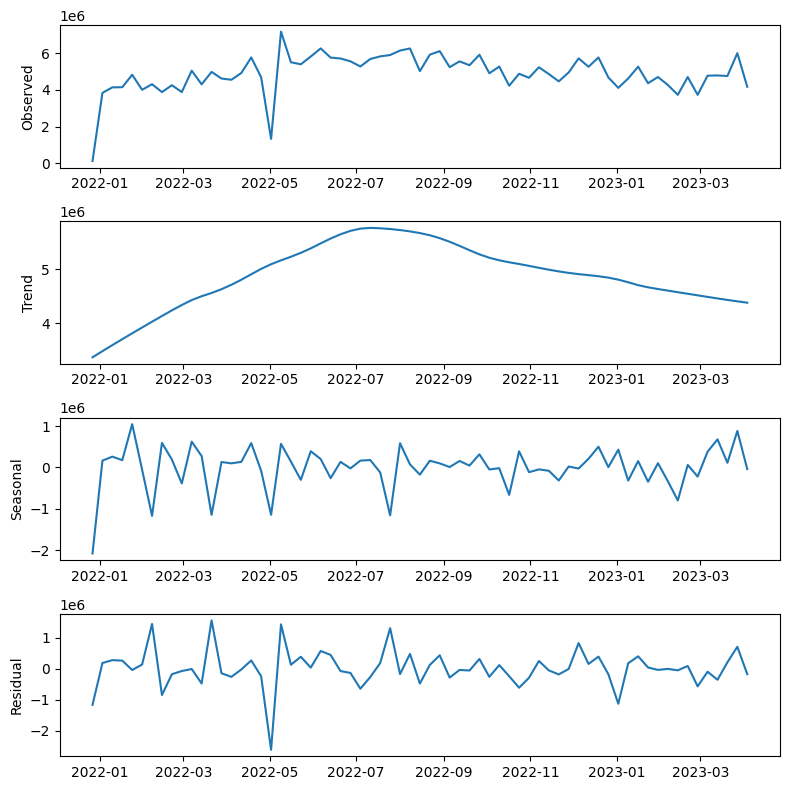

In [277]:
# Plot components
fig, axes = plt.subplots(4, 1, figsize=(8, 8))
axes[0].plot(res.observed)
axes[0].set_ylabel('Observed')
axes[1].plot(res.trend)
axes[1].set_ylabel('Trend')
axes[2].plot(res.seasonal)
axes[2].set_ylabel('Seasonal')
axes[3].plot(res.resid)
axes[3].set_ylabel('Residual')

plt.tight_layout()
plt.show()

dari grafik diatas, telihat bahwa secara trend penjualan di 67 minggu terakhir, terlihat adanya kenaikan dari awal minggu sampai puncaknya di minggu 19. setelah itu penjualan mengalami penurunan sampai di minggu ke 67. jika ditelaah lebih dalam, sebelum minggu ke 19, terdapat penurunan penjualan yang sangat drastis. dengan melihat *event* pada minggu tersebut, saya ber-asumsi karena minggu ke 18 penjualan menurun dikarenakan konsumen sedang *mudik* dikarenakan pada minggu ke 19 nya tepat di minggu *Hari Raya Idul Fitri 1442 Hijriah*. selain itu, faktor lainnya yang menyebabkan kenapa di minggu ke 19 mengalami penjualan yang sangat tinggi dikarenakan adanya kemungkinan konsumen sedang senang mengeluarkan uang di hari raya guna hadiah hari raya, dan adanya kemungkinan proses pencatatan pada minggu sebelumnya yang belum sempat tercatat masuk ke minggu ini sehingga bila dirata-ratakan di kedua minggu tersebut, penjualan terlihat normal.


sementara itu, di minggu pertama telihat penjualan sangat turun. saya berasumsi bahwa pada minggu pertama, sistem pencatatannya baru dilaksanakan di hari yang berdekatan dengan awal pencatatan pada minggu kedua sehingga interval waktu penjualannya sangat pendek. selain itu, dikarenakan mencuatnya kasus *covid-19* yang terjadi di minggu itu menyebabkan konsumen lebih tidak keluar rumah dahulu.

## Feature Enginering

In [281]:
df_drop = df.loc[:, df.columns.isin(['week_start_date', 'quantity'])]  # mengambil data week_start_date dan quantity saja
df_group = df_drop.groupby('week_start_date').sum() # menggabungkan data tersebut berdasarkan week_start_date untuk proses model learning nya

disini, saya tetap menggunakan data yang kosong di `product_item` dikarenakan data tersebut akan saya gabungkan berdasarkan `week_start_date` sehingga tidak berpengaruh akan hilangnya data `product_item`.

selain itu, saya tidak melakukan normalisasi pada outlier dikarenakan semua data yang berada pada dataset kali ini merupakan data yang natural. sehingga saya tidak perlu menghilangkan data yang berada diatas maupun dibawah *outlier*. selain itu, hal ini bertujuan untuk mengurangi bias pada hasil *forecast* yang akan dihasilkan nantinya.

## Preprocessing

membuat fungsi untuk mengecek apakah data sudah stasioneritas atau belum dengan tingkat kepercayaan yang ditentukan.

In [50]:
def check_stationarity(series):
    # Copied from https://machinelearningmastery.com/time-series-data-stationary-python/

    result = adfuller(series.values)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

In [51]:
check_stationarity(df_group['quantity'])

ADF Statistic: -3.328832
p-value: 0.013638
Critical Values:
	1%: -3.537
	5%: -2.908
	10%: -2.591
Stationary


didapati bahwa data yang dihasilkan sudah stationer dengan p-value di angka 0.05.

In [74]:
#Autoarima gives us bet model suited for the data
# p - number of autoregressive terms (AR)
# q - Number of moving avergae terms (MA)
# d - number of non-seasonal differences
#p, d, q represent non-seasonal components
#P, D, Q represent seasonal components
arima_model = auto_arima(df_group['quantity'][1:], start_p = 1, d=1, start_q = 1, 
                          max_p = 5, max_q = 5, max_d=5, m = 12, 
                          start_P = 1, D=1, start_Q=1, max_P=5, max_D=5, max_Q=5,
                          seasonal = True, 
                          trace = True, 
                          error_action ='ignore',   
                          suppress_warnings = True,  
                          stepwise = True, n_fits=50)           

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=1634.019, Time=0.60 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1670.421, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1643.678, Time=0.21 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1630.665, Time=0.18 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1648.944, Time=0.10 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1632.487, Time=0.43 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=1632.428, Time=0.60 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1637.124, Time=0.20 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=1634.070, Time=1.42 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=0.14 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1632.163, Time=0.21 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=1627.205, Time=0.17 sec
 ARIMA(0,1,2)(0,1,0)[12]             : AIC=1655.948, Time=0.06 sec
 ARIMA(0,1,2)(1,1,1)[12]             : AIC=1629.092, Time=0.26 sec
 ARIMA(0,1,2)(0,1,2)[12]

disini saya mencari model arima yang baik, didapati bahwa model terbaiknya ialah `ARIMA(0,1,2)(0,0,1)[12]`.

In [75]:
# To print the summary 
print(arima_model.summary() ) #Note down the Model and details.
# Model: SARIMAX(0, 0, 0)x(0, 0, [], 12)

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                   66
Model:             SARIMAX(0, 1, 2)x(0, 1, [1], 12)   Log Likelihood                -809.602
Date:                              Sat, 15 Apr 2023   AIC                           1627.205
Time:                                      08:54:56   BIC                           1635.086
Sample:                                  01-03-2022   HQIC                          1630.236
                                       - 04-03-2023                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6211      0.109     -5.700      0.000      -0.835      -0.408
ma.L2          0.13

diketahui bahwa nilai AR di angka `0` dengan MA di angka `2` pada model terbaiknya. dengan waktu season terbaik pada tiap hitungan bulan, didapati bahwa nilai AIC nya berada pada `1627` dan BIC pada angka `1635`.

In [89]:
# Split train & Test
train = df_group[:66] 
test = df_group[66:] 

memecah data train dan data tes. disini saya menggunakan 1 saja data tes dikarenakan model yang dituju hanya perlu memprediksi 1 minggu kedepan saja.

## Model Defination

In [90]:
model = ARIMA(train['quantity'],  
                order = (0, 1, 2),  
                seasonal_order =(0, 1, 1, 12)) 
  
result = model.fit() 
result.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                           quantity   No. Observations:                   66
Model:             ARIMA(0, 1, 2)x(0, 1, [1], 12)   Log Likelihood                -810.266
Date:                            Sat, 15 Apr 2023   AIC                           1628.533
Time:                                    09:02:23   BIC                           1636.414
Sample:                                12-27-2021   HQIC                          1631.563
                                     - 03-27-2023                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6697      0.120     -5.570      0.000      -0.905      -0.434
ma.L2          0.1703      0.207      0.824      0.410      -0.235       0.575
ma.S.L12      -0.8493      0.210     -4.043      0.000      -1.261      -0.438
sigma2      1.193e+12   1.83e-13   6.52e+24      0.000    1.19e+12    1.19e+12
===================================================================================
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):                21.22
Prob(Q):                              0.70   Prob(JB):                         0.00
Heteroskedasticity (H):               0.26   Skew:                             0.33
Prob(H) (two-sided):                  0.01   Kurtosis:                         6.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.52e+40. Standard errors may be unstable.
"""

SARIMA (Seasonal Autoregressive Integrated Moving Average) adalah model statistik untuk memodelkan deret waktu yang mengandung pola musiman dan tren.

Model SARIMA memperluas model ARIMA (Autoregressive Integrated Moving Average) dengan memasukkan komponen musiman, sehingga dapat menangani deret waktu dengan fluktuasi musiman.

Model SARIMA umumnya digunakan dalam analisis deret waktu untuk memprediksi nilai masa depan dan mengevaluasi dampak peristiwa tertentu pada deret waktu.

## Model Training

### prediksi data latihan

In [91]:
#Train prediction
start_index = 0
end_index = len(train)-1
train_prediction = result.predict(start_index, end_index) 
pd.DataFrame(train_prediction)

,predicted_mean
2021-12-27,0.000000e+00
2022-01-03,6.048170e+04
2022-01-10,1.386451e+06
2022-01-17,2.903364e+06
2022-01-24,3.781340e+06
...,...
2023-02-27,4.916087e+06
2023-03-06,4.483389e+06
2023-03-13,4.598727e+06
2023-03-20,4.602047e+06


#### model evaluation

In [296]:
print('MAE train = ', mean_absolute_error(train, train_prediction))
print('MAPE train = ', mean_absolute_percentage_error(train, train_prediction))

MAE train =  804969.2156529878
MAPE train =  0.21087661138975677


dari model SARIMA yang diperoleh untuk memprediksi semua data latihan, didapati bahwa model mampu memprediksi dengan tingkat MAPE sebesar 21% dengan MAE sebesar 804969 pcs.

### prediksi data tes

In [324]:
#Prediction
start_index = len(train)
end_index = len(df_group)-1
prediction = result.predict(start_index, end_index).rename('Predicted quantity')  #Rename the column
prediction

2023-04-03    4.388863e+06
Freq: W-MON, Name: Predicted quantity, dtype: float64

In [325]:
test

,quantity
week_start_date,
2023-04-03,4172070


#### model evaluation

In [327]:
print('MAE test = ', mean_absolute_error(test, prediction))
print('MAPE test = ', mean_absolute_percentage_error(test, prediction))

MAE test =  216793.0551706776
MAPE test =  0.051962947690397714


dengan menguji model ke 1 data tes yang kita miliki, didapati bahwa model dapat memprediksi dengan nilai MAPE di kisaran 5,2% dengan MAE sebesar 216793 pcs.

### rata-rata prediksi pada 3 minggu sebelumnya. 

In [328]:
#Prediction
start_index = len(train)
end_index = len(df_group)-1
prediction_0 = result.predict(start_index, end_index).rename('Predicted quantity')  #Rename the column
prediction_0

2023-04-03    4.388863e+06
Freq: W-MON, Name: Predicted quantity, dtype: float64

In [329]:
start_index = len(train)-1
end_index = len(df_group)-2
prediction_1 = result.predict(start_index, end_index).rename('Predicted quantity')  #Rename the column
prediction_1

2023-03-27    4.371821e+06
Freq: W-MON, Name: Predicted quantity, dtype: float64

In [330]:
start_index = len(train)-2
end_index = len(df_group)-3
prediction_2 = result.predict(start_index, end_index).rename('Predicted quantity')  #Rename the column
prediction_2

2023-03-20    4.602047e+06
Freq: W-MON, Name: Predicted quantity, dtype: float64

#### model evaluation

In [332]:
print('MAE test 2023-04-03 = ', mean_absolute_error(test, prediction_0))
print('MAE test 2023-03-27 = ', mean_absolute_error(train[-1:], prediction_1))
print('MAE test 2023-03-20 = ', mean_absolute_error(train[-2:-1], prediction_2))

MAE test 2023-04-03 =  216793.0551706776
MAE test 2023-03-27 =  1629345.2591375988
MAE test 2023-03-20 =  155543.05315025058


In [323]:
(216793+1629345+155543)/3

667227.0

bila saya lakukan prediksi mundur, maka nilai MAE yang didapat sebesar `667227` pcs.

## Forecasting

---------------------------------------------
forecasting on this week and next week
2023-04-03    4.388863e+06
2023-04-10    5.798467e+06
Freq: W-MON, Name: Forecast, dtype: float64
---------------------------------------------


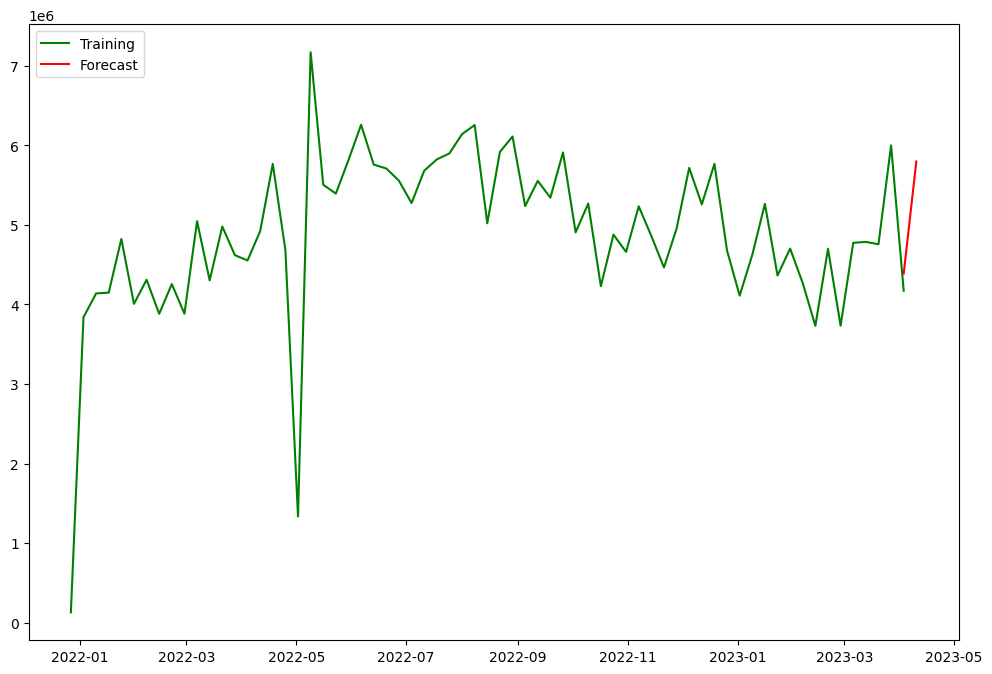

In [284]:
forecast = result.predict(start = len(train),  
                          end = (len(df_group)),  
                          typ = 'levels').rename('Forecast') 
print('---'*15)
print('forecasting on this week and next week')
print(forecast)
print('---'*15)
  
plt.figure(figsize=(12,8))
plt.plot(df_group, label='Training', color='green')
plt.plot(forecast, label='Forecast', color='red')
plt.legend(loc='upper left')
plt.show()

dengan melihat nilai MAE dan MAPE di minggu sebelumnya, saya memprediksi bahwa total penjualan di minggu ke 15 tahun 2023 berkisar `5,8e+06` dengan asumsi range MAE yang hampir sama dengan minggu ke 14 tahun 2023.

# Conclusion

### EDA insight

pada dataset yang digunakan kali ini, terdapat total data sejumlah 102733 baris dengan 5 kolom yang berbeda. ditemukan pula beberapa data yang kosong, namun hal ini tidak begitu berpengaruh dikarenakan nantinya data akan dikelompokkan berdasarkan tiap minggu-nya. data tersebar ke 67 minggu yang dimulai dari minggu ke 52 tahun 2021 sampai minggu ke 14 tahun 2023. hasil perbandingan di 14 minggu pertama pada tahun 2022 dan 2023, penjualan produk mengalami kenaikan sebanyak lebih dari 3 juta unit. 

bila ditinjau dari segi bisnisnya, masih terdapat banyak jenis produk yang tidak laku dipasaran, hal ini dapat saya simpulkan berdasarkan banyaknya temuan penjualan jenis produk yang terjual hanya 2 unit saja pada tahun 2022. saya merekomendasikan untuk menghilangkan jenis produk dengan penjualan yang sangat rendah agar biaya yang dikeluarkan oleh perusahaan dapat ditekan seminimal mungkin. bila ditinjau dari sejarahnya, penjualan pada minggu mendekati *idul fitri* akan mengalami kenaikan. sehingga, dalam jangka pendek, saya merekomendasikan untuk mempersiapkan ketersediaan stok produk. Menurut informasi terbaru pada tanggal 15 april, diketahui bahwa akan ada kesulitan pengiriman pada minggu menjelang dan sesudah *idul fitri* dikarenakan tidak boleh beroperasinya truk sumbu 3 pada minggu dekat-dekat itu.

### Model insight

pada model kali ini, saya menggunakan SARIMA sebagai dasar *forecasting* yang saya lakukan. SARIMA itu sendiri adalah model statistik yang digunakan untuk memodelkan deret waktu dengan komponen musiman sehingga luas lingkupnya lebih besar ketimbang ARIMA. 

Saya tidak melakukan handling outlier pada data kali ini, hal ini dikarenakan saya mengetahui bahwa data yang diperoleh merupakan data yang original/natural. data cleaning pada data yang kosong pun saya lewati dikarenakan nantinya data tersebut akan saya gabungkan berdasarkan tiap minggunya sehingga data yang hilang tersebut akan dihilangkan semuanya.

Dengan pencarian AR dan MA terbaik, didapati bahwa model SARIMA terbaik memiliki parameter `(0, 1, 2)x(0, 1, [1], 12`. Dengan melakukan prediksi di minggu terakhir pada data yang disediakan, didapati nilai MAPE nya kurang dari `5,2%` dengan MAE sebesar `216793` unit. namun, bila dilihat dari 3 minggu, rata-rata nilai MAE meningkat menjadi `667227` unit. dengan nilai p-value yang kecil tidak menutup kemungkinan bahwa model dapat memprediksi akurat. hal ini dapat dilihat dengan melihat nilai MAE pada minggu ke 13 tahun 2023 yang memiliki nilai MAE sangat tinggi.

Dengan nilai MAE di minggu ke 14 tahun 2023, maka saya berasumsi bahwa model dapat melakukan forecast untuk minggu ke 15 tahun 2023 dengan nilai `5.8e+6` dengan nilai MAE yang masih dikisaran pada minggu sebelumnya.

## Saran Kedepannya.

dengan melihat dari semua aspek yang telah saya paparkan, maka diperlukannya data yang lebih banyak setidaknya 104 minggu atau 2 tahun rentangnya. hal ini untuk memastikan apakah data yang dimiliki benar-benar memiliki `season` di tiap tahunnya atau dia hanya `fluke` pada bulan tersebut. selain itu, perlu di-coba pada model lainnya seperti LSTM (Long Short-Term Memory) untuk memprediksi data *time-series* kali ini. 